In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Models.Layers import *
from Solver import *
from Models.Classifiers.Logistic_Classifier import *

In [63]:
# first step would be to import the dataset
X_full = pd.read_csv('./Datasets/red_wine_dataset.csv')
percentage = 0.8
X_full.pop('k_value')
X_full.pop('l_value')
X_full.pop('m_value')
X_train = X_full.sample(frac=percentage, random_state=0)
y_train = X_train.pop('quality')
X_test = X_full.drop(X_train.index)
y_test = X_test.pop('quality')
print(len(X_train.index))
print(len(X_test.index))
X_full


1279
320


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,percentage_free_sulphur,n_value
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,30.909091,0.6080
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,26.800000,0.8290
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,36.000000,0.7440
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,35.294118,0.7195
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,30.909091,0.6080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,13.750000,0.6610
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1,13.076923,0.7110
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,13.793103,0.7540
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,13.750000,0.6615


In [64]:
x_train = X_train.to_numpy()
x_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
print(x_train.shape)
print(x_test.shape)
print(x_train.dtype)
print(y_train.shape)

(1279, 13)
(320, 13)
float64
(1279,)


(1279, 13)
(1279,)
3.999927832269524e-16
1.0


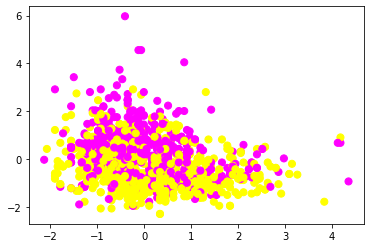

In [65]:
# x_max = np.max(x_train, axis = 0)
# x_min = np.min(x_train, axis = 0)
# x_train = (x_train - x_min) / (x_max - x_min)
mu = x_train.mean(axis = 0)
sigma = x_train.std(axis = 0)
x_train  = (x_train - x_train.mean(axis = 0))/x_train.std(axis = 0)
# mu = x_min
# sigma = (x_max - x_min)
print(x_train.shape)
print(y_train.shape)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=50, cmap='spring')
print(x_train[:,3].mean())
print(x_train[:,3].std())
plt.show()


In [66]:
class TwoLayerNet():
    def __init__(self, input_dim, hidden_dim, output_dim, reg = 0.01):
        self.reg = reg
        self.params = {}
        # Now we do intialization of the weights
        np.random.seed(0)
        self.params['W1'] = np.random.randn(input_dim, hidden_dim)*0.01
        self.params['b1'] = np.zeros(hidden_dim)
        self.params['W2'] = np.random.randn(hidden_dim, output_dim)*0.01
        self.params['b2'] = np.zeros(output_dim)
        self.output_dim = output_dim

    def loss(self,X,y = None):
        # define a mode here, i.e. a training mode or a test mode
        mode = 'test' if y is None else 'train'
        if(mode == 'train'):
            cache = {}
            loss = 0
            grads = {}
            z1, cache['affine_1'] = affine_forward(X,self.params['W1'],self.params['b1'])
            a1,cache['relu_1'] = relu_forward(z1)
            a2,cache['affine_2'] = affine_forward(a1,self.params['W2'], self.params['b2'])
            loss, da2 = softmax_loss(a2,y)
            da1, grads['W2'],grads['b2'] = affine_backward(da2,cache['affine_2'])
            dz1 = relu_backward(da1, cache['relu_1'])
            dx, grads['W1'],grads['b1'] = affine_backward(dz1, cache['affine_1'])
            loss = loss + self.reg * (np.sum(self.params['W1']**2) + np.sum(self.params['W2']**2))
            grads['W1'] = grads['W1'] + 2 * self.reg * self.params['W1']
            grads['W2'] = grads['W2'] + 2 * self.reg * self.params['W2']
            return loss, grads
        else:
            z1, cache['affine_1'] = affine_forward(X,self.params['W1'],self.params['b1'])
            a1,cache['relu_1'] = relu_forward(z1)
            a2,cache['affine_2'] = affine_forward(a1,self.params['W2'], self.params['b2'])
            loss, da2 = softmax_loss(a2,y)
            loss = loss + self.reg * (np.sum( (self.params['W1'] * self.params['W1'])))
            loss = loss + self.reg * (np.sum( (self.params['W2'] * self.params['W2'])))
            return loss
    def predict(self, X):
        cache= {}
        z1, cache['affine_1'] = affine_forward(X,self.params['W1'],self.params['b1'])
        a1,cache['relu_1'] = relu_forward(z1)
        a2,cache['affine_2'] = affine_forward(a1,self.params['W2'], self.params['b2'])
        print(a2.shape)
        return np.argmax(a2,axis = 1)





In [67]:
Model = TwoLayerNet(input_dim = x_train.shape[1], hidden_dim = 10, output_dim = 2)

loss, grads = Model.loss(x_train, y_train)

print("loss =", loss)

Model.params['W1'] = Model.params['W1'] - 0.1*grads['W1']
Model.params['b1'] = Model.params['b1'] - 0.1*grads['b1']
Model.params['W2'] = Model.params['W2'] - 0.1*grads['W2']
Model.params['b2'] = Model.params['b2'] - 0.1*grads['b2']

loss, grads = Model.loss(x_train, y_train)
print("shape of W_1 = ",Model.params['W1'].shape)
scores = Model.predict(x_train)



loss = 0.6931489451046741
shape of W_1 =  (13, 10)
(1279, 2)


In [68]:
class NewSolver():
    def __init__(self, model, X_train, y_train, lr = 0.05, batch_size = 20, num_epochs = 10, print_every = 1000):
        self.lr = lr
        self.data = {}
        self.data['X_train'] = X_train
        self.data['y_train'] = y_train
        self.model = model
        self.batch_size = batch_size
        self.num_epochs = num_epochs
        self.print_every = print_every
        self.loss_history = np.array([])
        self.grad_history = np.array([])
        self.vel_history = np.array([])
        self.loss_2_history = np.array([])
        self.grad_2_history = np.array([])
        pass
    def train(self):
        # mu = 0.95
        # v_w = np.zeros(self.model.params['W'].shape)
        # v_b = np.zeros_like(self.model.params['b']) 
        for i in range(self.num_epochs):
            for j in range(self.data['X_train'].shape[0] // self.batch_size):
                X_batch = self.data['X_train'][j * self.batch_size:(j + 1) * self.batch_size, :]
                y_batch = self.data['y_train'][j * self.batch_size:(j + 1) * self.batch_size].reshape(-1,1)
                loss, grads = self.model.loss(X_batch, y_batch)
                # v_w = v_w*mu - self.lr * grads['W']
                # v_b = v_b*mu - self.lr * grads['b']
                # self.model.params['W'] += v_w
                # self.model.params['b'] += v_b
                self.model.params['W1'] += -1 * self.lr * grads['W1']
                self.model.params['b1'] += -1 * self.lr * grads['b1']
                self.model.params['W2'] += -1 * self.lr * grads['W2']
                self.model.params['b2'] += -1 * self.lr * grads['b2']
                if(j  == 0):
                    print("Epoch = ", i, "Batch = ", j, "Loss = ", loss, "Gradient_max = ", np.max(abs(grads['W1'])), "learning rate ratio = ",np.max(self.lr*grads['W1']/self.model.params['W1']))
                    self.loss_history = np.append(self.loss_history, loss)
                    self.grad_history = np.append(self.grad_history, np.linalg.norm(grads['W1']))            
                    # self.loss_history = np.append(self.loss_history, loss)
                    # self.grad_history = np.append(self.grad_history, np.sum(grads['W1'] * grads['W1']))
                    # self.vel_history = np.append(self.vel_history, np.sum(v_w * v_w))
                if(j == 35):
                    self.loss_2_history = np.append(self.loss_2_history, loss)
                    self.grad_2_history = np.append(self.grad_2_history, np.linalg.norm(grads['W1']))

        

In [69]:
SGD = NewSolver(Model, x_train, y_train, lr = 1.9e-5, batch_size = 20, num_epochs = 1000, print_every = 1000)
SGD.train()



Epoch =  0 Batch =  0 Loss =  13.870685461350291 Gradient_max =  0.0032098391810733355 learning rate ratio =  0.00023407288408260372
Epoch =  1 Batch =  0 Loss =  13.870680858450504 Gradient_max =  0.0032072313045777233 learning rate ratio =  0.0002354943871039326
Epoch =  2 Batch =  0 Loss =  13.870676258930187 Gradient_max =  0.0032046246956387425 learning rate ratio =  0.0002369307501191725
Epoch =  3 Batch =  0 Loss =  13.870671662787103 Gradient_max =  0.0032020193532253695 learning rate ratio =  0.00023838221074559134
Epoch =  4 Batch =  0 Loss =  13.870667070019024 Gradient_max =  0.0031994152763070985 learning rate ratio =  0.00023984901168399824
Epoch =  5 Batch =  0 Loss =  13.870662480623706 Gradient_max =  0.0031968124638539455 learning rate ratio =  0.00024133140085544986
Epoch =  6 Batch =  0 Loss =  13.87065789459893 Gradient_max =  0.0031942109148364374 learning rate ratio =  0.00024282963154239316
Epoch =  7 Batch =  0 Loss =  13.870653311906588 Gradient_max =  0.00319

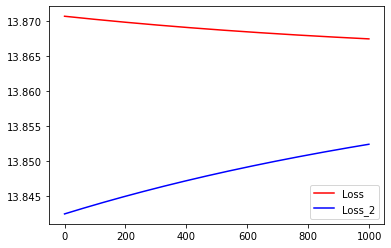

In [70]:
epochs = range(0,SGD.num_epochs)
test_epochs  = range(0,SGD.loss_history.shape[0])
plt.plot(test_epochs, SGD.loss_history, label = 'Loss Batch 0 ', color = 'red')
plt.plot(test_epochs, SGD.loss_2_history, label = 'Loss Batch 35', color = 'blue')
plt.legend()
plt.show()

In [71]:
# plt.plot(epochs, SGD.vel_history, label = 'Velocity', color = 'blue')
# plt.legend()
# plt.show()

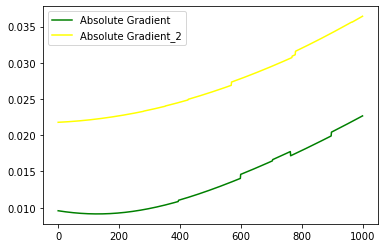

In [72]:
plt.plot(test_epochs, SGD.grad_history, label = 'Absolute Gradient', color = 'green')
plt.plot(test_epochs, SGD.grad_2_history, label = 'Absolute Gradient_2', color = 'yellow')
plt.legend()
plt.show()

In [73]:
def training_accuracy(model, x_train,y_train):
    y_pred = model.predict(x_train)
    y_new = y_train.reshape(y_pred.shape)
    return np.sum(y_new == y_pred) / y_new.shape[0]

print(np.sum(Model.predict(x_train)))
training_accuracy(Model, x_train, y_train)



(1279, 2)
1258
(1279, 2)


0.5371383893666928

In [74]:
def test_accuracy(model, x_test, y_test, mu, sigma):
    y_pred = model.predict((x_test - mu) / sigma)
    y_new = y_test.reshape(y_pred.shape)
    return np.sum(y_new == y_pred) / y_new.shape[0]

x_test_new = x_test
x_test_new = x_test_new 
test_accuracy(Model, x_test_new, y_test, mu, sigma)

(320, 2)


0.540625